<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/GradientBoostingClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요한 라이브러리 추가
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
# 1 데이터 로딩
iris = datasets.load_iris()

In [4]:
# 2 데이터 분할
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state = 10)

In [5]:
gtb = GradientBoostingClassifier()  # default 값 max_depth = 3

In [6]:
# 4 fitting model
gtb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [7]:
# 5 훈련 데이터 
print("훈련 세트 점수 : {:.3f}".format(gtb.score(X_train,y_train)))
print( "테스트 세트 점수 : {:.3f}".format(gtb.score(X_test,y_test)))

훈련 세트 점수 : 1.000
테스트 세트 점수 : 0.978


In [8]:
# 1. 데이터 불러오기
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()


In [9]:
# 2. 데이터 분류
Xb = breast.data
yb = breast.target
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state = 43)


In [10]:
# 3. modelling

## 3.1 max_depth = 1
gtb1 = GradientBoostingClassifier(max_depth=1).fit(Xb_train, yb_train)
print("훈련 세트 점수 : {:.3f}".format(gtb1.score(Xb_train,yb_train)))
print( "테스트 세트 점수 : {:.3f}".format(gtb1.score(Xb_test,yb_test)))
# 결과 : 훈련 세트 점수 : 0.990  테스트 세트 점수 : 0.977

훈련 세트 점수 : 0.990
테스트 세트 점수 : 0.977


In [11]:
## 3.2 max_depth = 2
gtb2 = GradientBoostingClassifier(max_depth=2).fit(Xb_train, yb_train)
print("훈련 세트 점수 : {:.3f}".format(gtb2.score(Xb_train,yb_train)))
print( "테스트 세트 점수 : {:.3f}".format(gtb2.score(Xb_test,yb_test)))
# 결과 : 훈련 세트 점수 : 1.000 테스트 세트 점수 : 0.977

훈련 세트 점수 : 1.000
테스트 세트 점수 : 0.977


In [12]:
## 3.3 max_depth = 3
gtb3 = GradientBoostingClassifier(max_depth=3).fit(Xb_train, yb_train)
print("훈련 세트 점수 : {:.3f}".format(gtb3.score(Xb_train,yb_train)))
print( "테스트 세트 점수 : {:.3f}".format(gtb3.score(Xb_test,yb_test)))
# 결과 : 훈련 세트 점수 : 1.000 테스트 세트 점수 : 0.977

훈련 세트 점수 : 1.000
테스트 세트 점수 : 0.977


In [14]:
# 4. 모델링 반복(max_depth = 2를 이용하여)
train_acc, test_acc = [],[]
n_estimators = range(5,201,5)

In [15]:
for n_estimator in n_estimators:
    # 모델 생성
    gtb3_depth_n = GradientBoostingClassifier(n_estimators=n_estimator, random_state=n_estimator, max_depth=2)
    
    gtb3_depth_n.fit(Xb_train, yb_train)
    
    train_acc.append(gtb3_depth_n.score(Xb_train, yb_train))
    test_acc.append(gtb3_depth_n.score(Xb_test, yb_test))

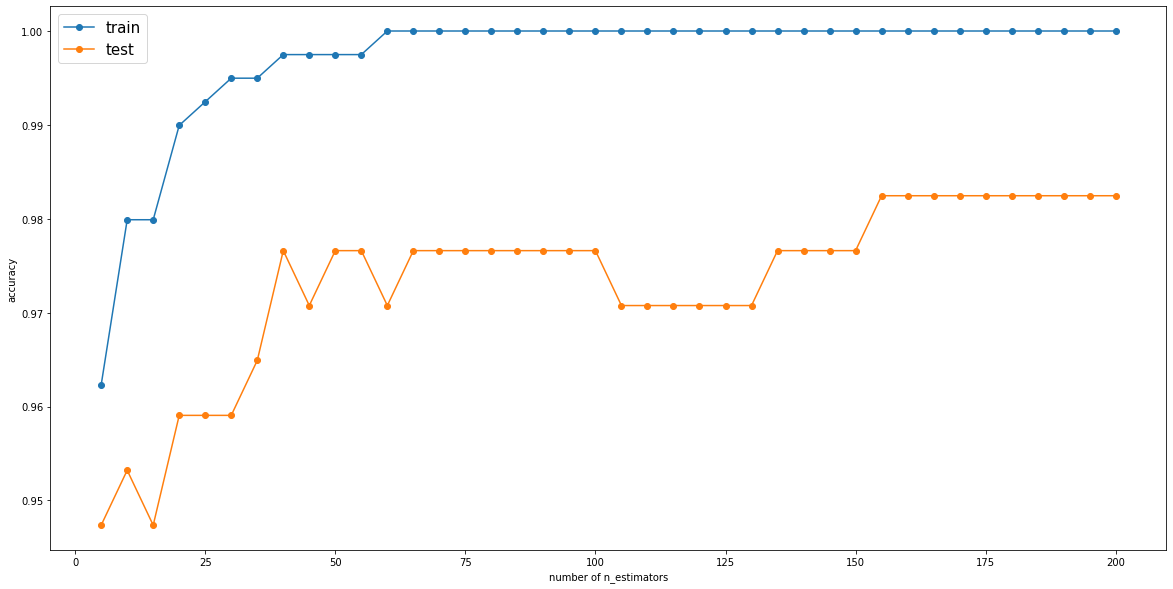

In [16]:
# 5. estimator 변화에 따른 결과 그래프로 확인
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plt.plot(n_estimators, train_acc, label="train",marker='o')
plt.plot(n_estimators, test_acc, label="test",marker='o')
plt.ylabel('accuracy')
plt.xlabel('number of n_estimators')
plt.legend(fontsize=15)

In [17]:
# 6. 최종 모델 확인
gtb3_depth_n = GradientBoostingClassifier(n_estimators=155, random_state=155, max_depth=2, learning_rate=0.1)
gtb3_depth_n.fit(Xb_train, yb_train)
    
# 훈련 정확도 출력
print("훈련 세트 점수 : {:.3f}".format(gtb3_depth_n.score(Xb_train,yb_train)))
print( "테스트 세트 점수 : {:.3f}".format(gtb3_depth_n.score(Xb_test,yb_test)))

# learning_rate를 높이면 보정을 강하게 하기 때문에 복잡한 모델을 만듭니다.(default = 0.1)
# n_estimator 값을 키우면 ensemble에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 train 세트를 더 정확하게 fitting합니다.

훈련 세트 점수 : 1.000
테스트 세트 점수 : 0.982
